In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, MaxPool1D, Dropout, Dense, GlobalMaxPooling1D, Embedding, Activation
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [12]:
train_data = pd.read_csv('/content/TargetData.csv')
test_data = pd.read_csv('/content/TargetData.csv')

In [13]:
train_data.head()

,text,label,target
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,2
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1
4,পাকিস্তান আমার বাল,Geopolitical,1


In [14]:
def preprocess_text(sen):
    # lower the character
    sentence = sen.lower()
    
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    stops = stopwords.words('english')
    
    for word in sentence.split():
        if word in stops:
            sentence = sentence.replace(word, '')
    return sentence

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# preprocess data

train_data['text'] = train_data['text'].apply(lambda x : preprocess_text(x))
test_data['text'] = test_data['text'].apply(lambda x : preprocess_text(x))

In [17]:
# tokenize the data

token = Tokenizer(28164)
token.fit_on_texts(train_data['text'])
text = token.texts_to_sequences(train_data['text'])
text = pad_sequences(text, maxlen=100)

In [19]:
y = train_data['target'].values

In [20]:
# split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(text, y, test_size=0.2, random_state=1, stratify=y)

In [21]:
# build the model

max_features = 28164
embedding_dim = 32

model = Sequential()
model.add(Embedding(max_features, embedding_dim))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          901248    
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 lstm (LSTM)                 (None, None, 32)          8320      
                                                                 
 dropout_1 (Dropout)         (None, None, 32)          0         
                                                                 
 dense (Dense)               (None, None, 1)           33        
                                                                 
 activation (Activation)     (None, None, 1)           0         
                                                                 
Total params: 909,601
Trainable params: 909,601
Non-trai

In [23]:
# compile and train model

model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, batch_size=1024, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


InvalidArgumentError: ignored

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [27]:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

ValueError: ignored

In [28]:
df=pd.read_csv("/content/TargetData.csv")

In [29]:
df.head()

,text,label,target
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,2
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1
4,পাকিস্তান আমার বাল,Geopolitical,1


In [30]:
df.shape

(99, 3)

In [31]:
df.isnull().sum()

text      0
label     0
target    0
dtype: int64

In [38]:
df=pd.read_csv("/content/TargetData (1).csv")

In [39]:
df.head()

,text,label,target
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,2
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1
4,পাকিস্তান আমার বাল,Geopolitical,1


In [40]:
df.shape

(99, 3)

In [41]:
df.isnull().sum()

text      0
label     0
target    0
dtype: int64

In [42]:
df.head(10)

,text,label,target
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,2
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1
4,পাকিস্তান আমার বাল,Geopolitical,1
5,তোদের মতো কুত্তার বাচ্চারা সোনিকার মতো মেয়েরা ...,Personal,3
6,খানকির পোলা রোহিঙ্গারা বাংলাদেশে ঢুকলে কি তোর ...,Gender abusive,4
7,ভারত মোদের বাঁশভাই দাদারা আসারদরকার নাই ও আশাম...,Geopolitical,1
8,এদের কে চোদ্দ বছরে ফাসি দেয়া হোক,Personal,3
9,এজন্য ভারত বাংলাদেশে এসে হোয়াইট ওয়াস হয়েগেছে ম...,Geopolitical,1


In [44]:
df['target'].unique()


array([1, 2, 3, 4])

In [46]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


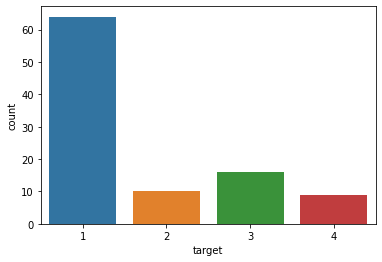

In [47]:
sns.countplot('target',data=df)

In [51]:
df[df['target']==1]['target']=2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df.head(5)

,text,label,target
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,2
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1
4,পাকিস্তান আমার বাল,Geopolitical,1


In [53]:
df['target'].unique()

array([1, 2, 3, 4])

In [56]:
df[df['target']==1]

,text,label,target
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1
4,পাকিস্তান আমার বাল,Geopolitical,1
7,ভারত মোদের বাঁশভাই দাদারা আসারদরকার নাই ও আশাম...,Geopolitical,1
...,...,...,...
92,মাহী সে মানুষ টা বেশী ভাল না,Geopolitical,1
93,ভারতকে যারা পছন্দ করেননা ভাল কথা কিন্ত পাকিরাও...,Geopolitical,1
94,ভারতীয় নিয়ে এসে অবৈধ আব্বার পশ্চাৎদেশ শিশ্ন ...,Geopolitical,1
97,আন্দালিব ভাই এই মাগীর পুতেরা কিসু জানে না ...,Geopolitical,1


In [57]:
df["target"].replace({0: 1}, inplace=True)

In [58]:
df['target'].unique()

array([1, 2, 3, 4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


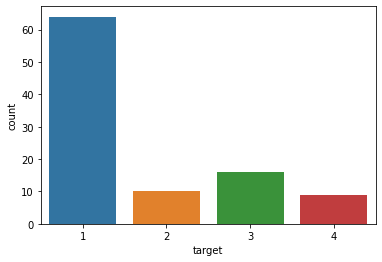

In [59]:
sns.countplot('target',data=df)

In [60]:
df[df['target']==0]

,text,label,target


In [61]:
df["target"].replace({2: 0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


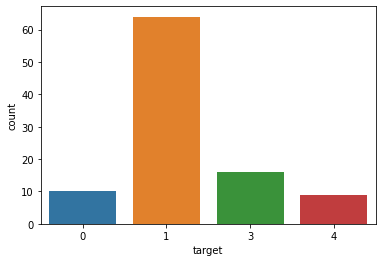

In [62]:
sns.countplot('target',data=df)

In [63]:
df.head()

,text,label,target
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,0
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1
4,পাকিস্তান আমার বাল,Geopolitical,1


In [64]:
df.iloc[0]['text']

'ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পারিকর  এই কদিন আগেই যিনি ঘোষনা দেন বাংলাদেশ দখল করে মহাভারত গঠন করবেন আশ্চর্য তিনিই কিনা আমাদের বরেন্য রাষ্ট্রীয় অতিথি'

In [65]:
df.iloc[5]['text']

'তোদের মতো কুত্তার বাচ্চারা সোনিকার মতো মেয়েরা পাইলে শিওর গ্যাংব্যাং দিবি'

In [66]:
frame=[df,df]
df = pd.concat(frame)

In [67]:
df.head()

,text,label,target
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,0
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1
4,পাকিস্তান আমার বাল,Geopolitical,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


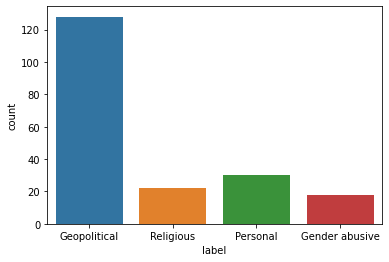

In [68]:
sns.countplot('label',data=df)

In [69]:
df.shape

(198, 3)

In [70]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [71]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [72]:
df['text']=df['text'].apply(clean_text)

In [73]:
df.head()

,text,label,target
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,0
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1
4,পাকিস্তান আমার বাল,Geopolitical,1


In [74]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  

In [75]:
def make_wordcloud(df):
    comment_words=""
    for val in df.text: 
        val = str(val).lower()

      
        comment_words += " ".join(val)+" "
    print(comment_words[0:100])
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)
  
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()


In [77]:
x=df['text']
y=df['target']

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

148 148
50 50


In [79]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer=count.fit_transform(x_train)

In [80]:
x_test_vectorizer=count.transform(x_test)
x_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [81]:
count.vocabulary_

{'আম': 377,
 'এখন': 1081,
 'ইনশ': 714,
 'আল': 569,
 'আরব': 564,
 'আছ': 218,
 'হল': 3855,
 'রজ': 3000,
 'সন': 3571,
 'আম এখন': 408,
 'এখন ইনশ': 1082,
 'ইনশ আল': 715,
 'আল আরব': 570,
 'আরব আছ': 565,
 'আছ হল': 244,
 'হল রজ': 3880,
 'রজ সন': 3005,
 'আম এখন ইনশ': 409,
 'এখন ইনশ আল': 1083,
 'ইনশ আল আরব': 716,
 'আল আরব আছ': 571,
 'আরব আছ হল': 566,
 'আছ হল রজ': 245,
 'হল রজ সন': 3881,
 'আম এখন ইনশ আল': 410,
 'এখন ইনশ আল আরব': 1084,
 'ইনশ আল আরব আছ': 717,
 'আল আরব আছ হল': 572,
 'আরব আছ হল রজ': 567,
 'আছ হল রজ সন': 246,
 'আম এখন ইনশ আল আরব': 411,
 'এখন ইনশ আল আরব আছ': 1085,
 'ইনশ আল আরব আছ হল': 718,
 'আল আরব আছ হল রজ': 573,
 'আরব আছ হল রজ সন': 568,
 'নন': 2311,
 'রধ': 3278,
 'মন': 2769,
 'আপন': 309,
 'বলছ': 2607,
 'বরন': 2559,
 'কর': 1529,
 'এর': 1220,
 'কথ': 1461,
 'জনগণ': 1976,
 'একট': 1017,
 'পর': 2416,
 'অসহ': 151,
 'ধর': 2222,
 'রত': 3010,
 'তক': 2056,
 'উন': 840,
 'মক': 2716,
 'আশ': 587,
 'রয়': 3380,
 'অন': 30,
 'আব': 342,
 'আর': 468,
 'এই': 920,
 'এমন': 1212,
 'ওয়': 1393,
 'বন': 2496,
 'আ

In [82]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [84]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

[[ 5  0  0  0]
 [ 0 28  1  1]
 [ 0  2  9  0]
 [ 0  1  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.90      0.93      0.92        30
           3       0.90      0.82      0.86        11
           4       0.75      0.75      0.75         4

    accuracy                           0.90        50
   macro avg       0.89      0.88      0.88        50
weighted avg       0.90      0.90      0.90        50



In [85]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      1.00      0.75        30
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         4

    accuracy                           0.60        50
   macro avg       0.15      0.25      0.19        50
weighted avg       0.36      0.60      0.45        50

[[ 0  5  0  0]
 [ 0 30  0  0]
 [ 0 11  0  0]
 [ 0  4  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc' )

In [87]:
xgb_model_vectorizer = xgb_model.fit(x_train_vectorizer, y_train)
xgb_predictions_vectorizer=xgb_model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,xgb_predictions_vectorizer))
print (classification_report(y_test, xgb_predictions_vectorizer))

[[ 4  1  0  0]
 [ 2 28  0  0]
 [ 0  1  8  2]
 [ 0  1  0  3]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.90      0.93      0.92        30
           3       1.00      0.73      0.84        11
           4       0.60      0.75      0.67         4

    accuracy                           0.86        50
   macro avg       0.79      0.80      0.79        50
weighted avg       0.88      0.86      0.86        50



In [88]:
xgb_model = xgb_model.fit(x_train_tfidf, y_train)
xgb_predictions=xgb_model.predict(x_test_tfidf)
print(confusion_matrix(y_test,xgb_predictions))
print (classification_report(y_test, xgb_predictions))

[[ 5  0  0  0]
 [ 2 28  0  0]
 [ 0  0  9  2]
 [ 0  0  0  4]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.93      0.97        30
           3       1.00      0.82      0.90        11
           4       0.67      1.00      0.80         4

    accuracy                           0.92        50
   macro avg       0.85      0.94      0.87        50
weighted avg       0.94      0.92      0.92        50



In [91]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [92]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [93]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [94]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=5
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [95]:
history=model.fit(sequences_matrix,y_train,batch_size=1024,epochs=10,
          validation_split=0.2,callbacks=[stop,checkpoint])

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.6927 - accuracy: 0.3559 - val_loss: 0.6003 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 0.5974 - accuracy: 0.6610 - val_loss: 0.3859 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 0.3937 - accuracy: 0.6610 - val_loss: -1.3000 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: -1.0781 - accuracy: 0.6610 - val_loss: -2.7345 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: -2.3027 - accuracy: 0.6610 - val_loss: -3.3729 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: -2.8179 - accuracy: 0.6610 - val_loss: -3.8513 - val_accuracy: 0.6667
